Mount Google Drive:

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Add codes for EDA here and we'll convert them for Streamlit app later.

In [7]:
# update file path in google drive accordingly
file_path = "/content/drive/MyDrive/IT5006Group/ProjectData/ChicagoCrimes(20152025).csv"

In [8]:
import pandas as pd

df = pd.read_csv(file_path)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13711023,JJ103490,01/01/2015 12:00:00 AM,088XX S BISHOP ST,1261,DECEPTIVE PRACTICE,UNAUTHORIZED VIDEOTAPING,RESIDENCE,False,True,...,21.0,71.0,11,NaN,NaN,2015,01/05/2025 03:42:25 PM,NaN,NaN,NaN
1,13368845,JH152261,01/01/2015 12:00:00 AM,001XX N STATE ST,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,DEPARTMENT STORE,False,False,...,34.0,32.0,11,NaN,NaN,2015,02/15/2024 03:40:52 PM,NaN,NaN,NaN
2,13448318,JH247450,01/01/2015 12:00:00 AM,010XX N LECLAIRE AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,...,37.0,25.0,02,NaN,NaN,2015,05/03/2024 03:41:27 PM,NaN,NaN,NaN
3,13307644,JG540876,01/01/2015 12:00:00 AM,029XX N MASON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,30.0,19.0,11,NaN,NaN,2015,12/15/2023 03:47:28 PM,NaN,NaN,NaN
4,13734810,JJ132359,01/01/2015 12:00:00 AM,120XX S PRAIRIE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,9.0,53.0,11,NaN,NaN,2015,01/31/2025 03:41:28 PM,NaN,NaN,NaN


## Prepare Date and Time

Convert the 'Date' column to datetime objects with the specified format and `errors='coerce'` to handle potential parsing issues, and display the first few rows of the DataFrame to confirm the changes.




In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df = df.rename(columns={"Date":"Datetime"})
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time # pandas normalizes to 24-hour format
df.head()

,ID,Case Number,Datetime,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Date,Time
0,13711023,JJ103490,2015-01-01,088XX S BISHOP ST,1261,DECEPTIVE PRACTICE,UNAUTHORIZED VIDEOTAPING,RESIDENCE,False,True,...,11,NaN,NaN,2015,01/05/2025 03:42:25 PM,NaN,NaN,NaN,2015-01-01,00:00:00
1,13368845,JH152261,2015-01-01,001XX N STATE ST,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,DEPARTMENT STORE,False,False,...,11,NaN,NaN,2015,02/15/2024 03:40:52 PM,NaN,NaN,NaN,2015-01-01,00:00:00
2,13448318,JH247450,2015-01-01,010XX N LECLAIRE AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,...,02,NaN,NaN,2015,05/03/2024 03:41:27 PM,NaN,NaN,NaN,2015-01-01,00:00:00
3,13307644,JG540876,2015-01-01,029XX N MASON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,11,NaN,NaN,2015,12/15/2023 03:47:28 PM,NaN,NaN,NaN,2015-01-01,00:00:00
4,13734810,JJ132359,2015-01-01,120XX S PRAIRIE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,11,NaN,NaN,2015,01/31/2025 03:41:28 PM,NaN,NaN,NaN,2015-01-01,00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755021 entries, 0 to 2755020
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Datetime              datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

## Analyze Missing Data Over Time

Calculate the number and missing values for each column, grouped by year, to understand the trend of missing data over different years. This will provide insights into when certain data points started to be missing or were more prevalent.


In [ ]:
# Count number of cases per year
cases_per_year = df.groupby("Year").size()
print(cases_per_year)

Year
2015    264885
2016    269949
2017    269279
2018    269136
2019    261691
2020    212684
2021    209634
2022    239966
2023    263236
2024    258905
2025    235627
2026        29
dtype: int64


/tmp/ipython-input-3786496702.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



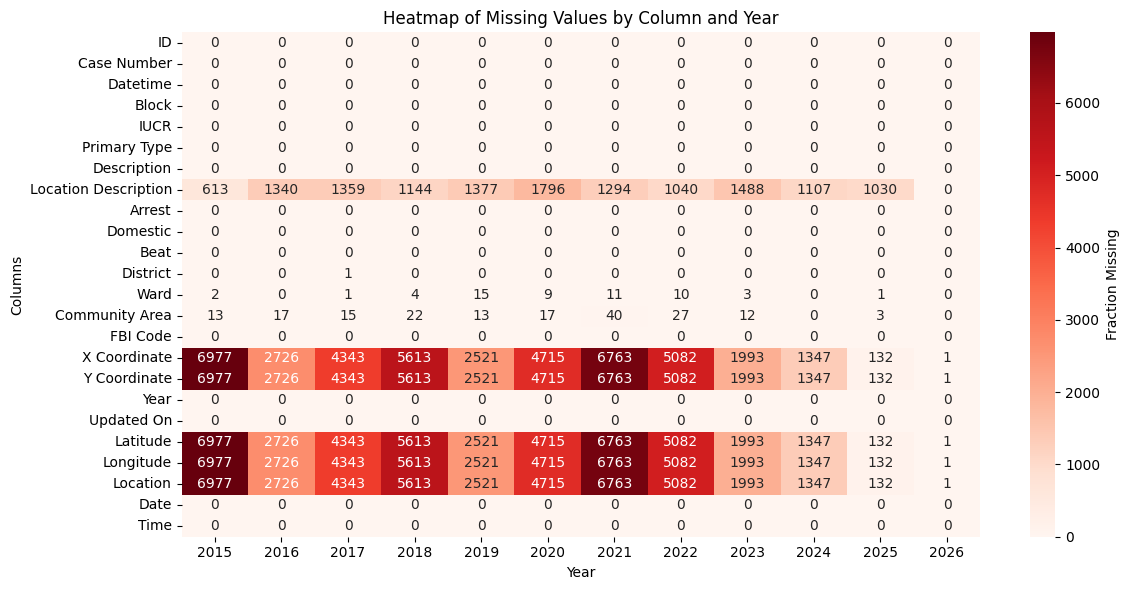

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate missing values by year and column
missing_by_year = df.groupby("Year").apply(lambda x: x.isnull().sum())

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_year.T, cmap="Reds", annot=True, fmt="d", cbar_kws={'label': 'Fraction Missing'})
plt.title("Heatmap of Missing Values by Column and Year")
plt.xlabel("Year")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()

## Remove Missing Data and 2026 Data

Total enteries is 2755021. Fraction of missing data is small which will not distort EDA when removed. Also, this simplifies workflow - avoid complexity of imputing values which can introduce bias if not done carefully. Plots and summaries will not be cluttered by NaN values too.

Also removed 2026 data such that EDA will focus on years 2015 - 2025.

In [ ]:
# Drop rows with any missing values and remove 2026 data
df_clean = df.dropna()
df_clean = df_clean[df_clean["Year"] != 2026]
print("Original entries:", len(df))
print("After dropping missing:", len(df_clean))

Original entries: 2755021
After dropping missing: 2703276


## Time Series Plot by Date, Week, Month and Year

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Ensure Colab renders Plotly charts
pio.renderers.default = "colab"

# Assuming df_clean already has a 'Datetime' column parsed
df_clean["Date"] = df_clean["Datetime"].dt.date
df_clean["Week"] = df_clean["Datetime"].dt.to_period("W").dt.start_time
df_clean["Month"] = df_clean["Datetime"].dt.to_period("M").dt.start_time
df_clean["Year"] = df_clean["Datetime"].dt.year

# Aggregate counts using df_clean
cases_by_date = df_clean.groupby("Date").size().reset_index(name="Cases")
cases_by_week = df_clean.groupby("Week").size().reset_index(name="Cases")
cases_by_month = df_clean.groupby("Month").size().reset_index(name="Cases")
cases_by_year = df_clean.groupby("Year").size().reset_index(name="Cases")

# Build figure with multiple traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=cases_by_date["Date"], y=cases_by_date["Cases"],
                         mode="lines", name="By Date", visible=True))
fig.add_trace(go.Scatter(x=cases_by_week["Week"], y=cases_by_week["Cases"],
                         mode="lines", name="By Week", visible=False))
fig.add_trace(go.Scatter(x=cases_by_month["Month"], y=cases_by_month["Cases"],
                         mode="lines", name="By Month", visible=False))
fig.add_trace(go.Bar(x=cases_by_year["Year"], y=cases_by_year["Cases"],
                     name="By Year", visible=False))

# Add dropdown menu to toggle visibility
fig.update_layout(
    title="Cases Over Time",
    updatemenus=[
        dict(
            type="dropdown",
            x=0.1, y=1.15,
            buttons=[
                dict(label="Date", method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "Cases by Date"}]),
                dict(label="Week", method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"title": "Cases by Week"}]),
                dict(label="Month", method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"title": "Cases by Month"}]),
                dict(label="Year", method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"title": "Cases by Year"}]),
            ]
        )
    ]
)

fig.show()


###Observations

Outlier number of crime incidents reported on specific dates. High number of crime 1877 reported on 31 May 2020. Low number of crime 110 and 115 on 19 Dec 2023 and 14 May 2024 respectively. Why?

Strictly lesser than 20k of crime incidents reported per month from Jan 2020 to May 2022. Is this due to Covid-19?

Appears to be some seasonality trend or pattern for crime rate annually.

## Seasonality Plot (over Months) by Year

Click on legend entries to hide/show specific years. Single click hides/shows one line. Double click isolates one line (hides all others).

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "colab"

# Assuming df_clean already has a 'Datetime' column parsed
df_clean["Month"] = df_clean["Datetime"].dt.month
df_clean["Year"] = df_clean["Datetime"].dt.year

# Aggregate counts by Year and Month
cases_by_month_year = (
    df_clean.groupby(["Year", "Month"])
    .size()
    .reset_index(name="Cases")
)

# Build figure with one trace per year
fig = go.Figure()

years = sorted(cases_by_month_year["Year"].unique())
for yr in years:
    data = cases_by_month_year[cases_by_month_year["Year"] == yr]
    fig.add_trace(go.Scatter(
        x=data["Month"], y=data["Cases"],
        mode="lines+markers",
        name=str(yr)  # legend entry
    ))

# Customize layout
fig.update_layout(
    title="Monthly Cases by Year (Seasonality)",
    xaxis=dict(
        tickmode="array",
        tickvals=list(range(1, 13)),
        ticktext=["Jan","Feb","Mar","Apr","May","Jun",
                  "Jul","Aug","Sep","Oct","Nov","Dec"]
    ),
    legend_title="Year",
    hovermode="x unified"
)

fig.show()




###Observation

Crime seems to dip / lowest in Feb, gradually increases thereafter and peaks in Jul or Aug, before declining again towards Dec.

While the broad pattern is similiar for 2020, it dipped later, reached lowest in Apr instead of Feb.

In 2019 and 2020, the crime rate dropped drastically with the most likely cause is the covid pandemic. The crime rate numbers continue to increase for the following years and continues to have the same seasonality patterns like the the other years.  

##Density Map of Crime Incidents

In [ ]:
# Validate that latitude is between -90 and 90 and longtitude is between -180 and 180
print(df_clean["Latitude"].min(), df_clean["Latitude"].max())
print(df_clean["Longitude"].min(), df_clean["Longitude"].max())


NameError: name 'df_clean' is not defined

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "colab"

# Assuming df_clean already has 'Datetime', 'Latitude', 'Longitude'
df_clean["Year"] = df_clean["Datetime"].dt.year

fig = px.density_mapbox(
    df_clean,
    lat="Latitude",
    lon="Longitude",
    radius=10,
    hover_data=["Year", "Date"],
    color_continuous_scale="Viridis",
    mapbox_style="open-street-map",
    zoom=9,   # higher zoom = closer view
    center={"lat": 41.8781, "lon": -87.6298},  # Chicago coordinates
    height=600,
    title="Incident Density Map - Chicago Focus",
    animation_frame="Year"   # optional: play by year
)

fig.show()